In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
first_4_years = pd.read_csv('data/processed/first_4y.csv', index_col=[0], parse_dates=True)

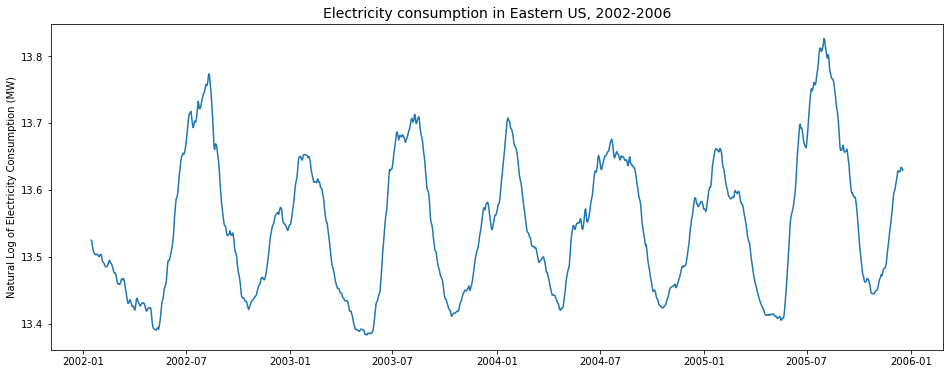

In [54]:
fig = plt.figure(figsize=(16,6))
plt.plot(first_4_years.roll_mean)
plt.title('Electricity consumption in Eastern US, 2002-2006', fontsize = 14)
plt.ylabel('Natural Log of Electricity Consumption (MW)')
fig.savefig('elec_seasonal_f4y.png')
fig.show()

In [10]:
first_4_years['weekday_name'] = first_4_years.index.day_name()
first_4_years['weekday'] = first_4_years.index.dayofweek

In [24]:
weekday_means = first_4_years.loc[:,['weekday_name','PJME_MW', 'weekday']].groupby('weekday_name').mean()

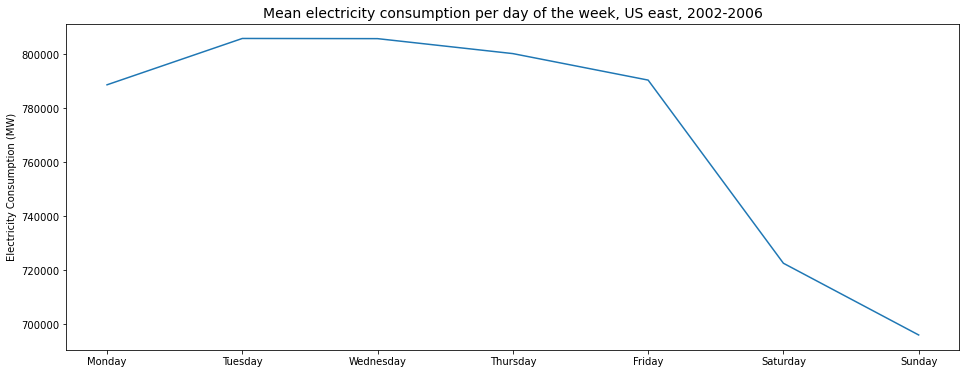

In [53]:
fig = plt.figure(figsize=(16,6))
plt.plot(weekday_means.sort_values('weekday').PJME_MW)
plt.title('Mean electricity consumption per day of the week, US east, 2002-2006', fontsize = 14)
plt.ylabel('Electricity Consumption (MW)')
fig.savefig('elec_weekly_f4y.png')
fig.show()

In [43]:
import holidays
us_holidays = holidays.US()
o_three = first_4_years['2003']
o_three['date'] = o_three.index.date
o_three['holiday'] = o_three['date'].apply(lambda d: d in us_holidays)


holiday_indices = o_three.loc[o_three.holiday == True].index



<ipython-input-43-e0101752b73e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_three['date'] = o_three.index.date
<ipython-input-43-e0101752b73e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_three['holiday'] = o_three['date'].apply(lambda d: d in us_holidays)


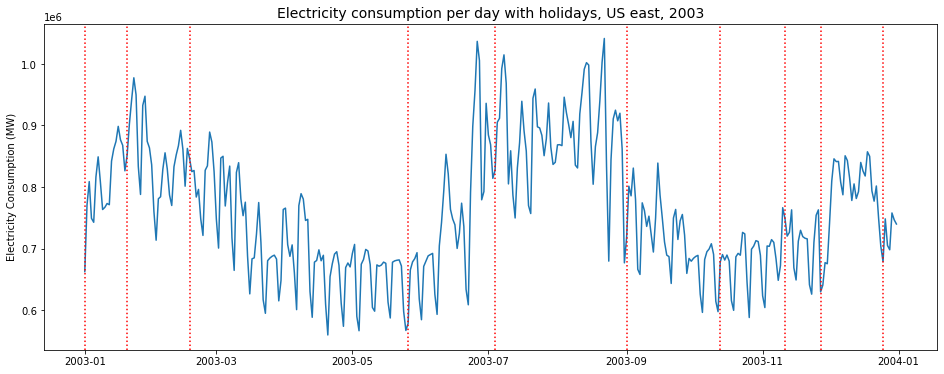

In [52]:
fig = plt.figure(figsize=(16,6))
plt.plot(o_three.PJME_MW)
plt.title('Electricity consumption per day with holidays, US east, 2003', fontsize = 14)
for holiday_index in holiday_indices:
    plt.axvline(holiday_index, color = 'r', ls = ':')
plt.ylabel('Electricity Consumption (MW)')
fig.savefig('elec_holidays_2003.png')
fig.show()

In [59]:
day_trend = pd.read_csv('data/processed/day_trend.csv', index_col = [0])

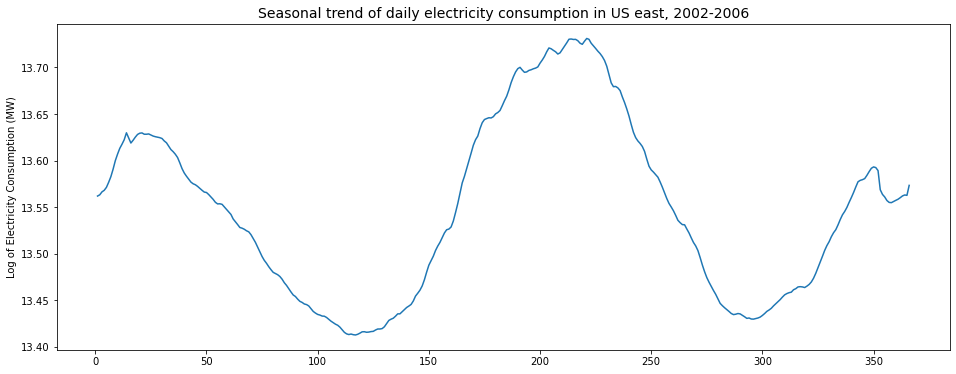

In [62]:
fig = plt.figure(figsize=(16,6))
plt.plot(day_trend)
plt.title('Seasonal trend of daily electricity consumption in US east, 2002-2006', fontsize = 14)
plt.ylabel('Log of Electricity Consumption (MW)')
fig.savefig('data/processed/elec_daytrend.png')
fig.show()

In [63]:
import patsy